<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 48.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61825788 sha256=9ce27d3b60f7a29b2616789f1d84e34c4611fd93c3297913931199bc9b5759e2
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9437105 sha256=49339033945c4032e6e7d5107c92964fb259340901041141a5deccd345510035
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [162]:

import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute15", count=440)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                           open        high         low       close  \
2023-04-22 14:45:00  36520000.0  36521000.0  36462000.0  36520000.0   
2023-04-22 15:00:00  36520000.0  36520000.0  36466000.0  36503000.0   
2023-04-22 15:15:00  36500000.0  36504000.0  36405000.0  36428000.0   
2023-04-22 15:30:00  36428000.0  36428000.0  36392000.0  36409000.0   
2023-04-22 15:45:00  36405000.0  36453000.0  36379000.0  36446000.0   
...                         ...         ...         ...         ...   
2023-04-27 09:30:00  39199000.0  39290000.0  38734000.0  38940000.0   
2023-04-27 09:45:00  38940000.0  39187000.0  38824000.0  39003000.0   
2023-04-27 10:00:00  39003000.0  39121000.0  38874000.0  38875000.0   
2023-04-27 10:15:00  38875000.0  38914000.0  38300000.0  38618000.0   
2023-04-27 10:30:00  38625000.0  38754000.0  38550000.0  38699000.0   

                         volume         value  
2023-04-22 14:45:00   41.512390  1.514786e+09  
2023-04-22 15:00:00   19.445608  7.097096e+08  
202

In [163]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-22 14:45:00,36520000.0
1,2023-04-22 15:00:00,36503000.0
2,2023-04-22 15:15:00,36428000.0
3,2023-04-22 15:30:00,36409000.0
4,2023-04-22 15:45:00,36446000.0
...,...,...
435,2023-04-27 09:30:00,38940000.0
436,2023-04-27 09:45:00,39003000.0
437,2023-04-27 10:00:00,38875000.0
438,2023-04-27 10:15:00,38618000.0


In [164]:
#prophet 불러옴
from fbprophet import Prophet

In [165]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [166]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=8, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


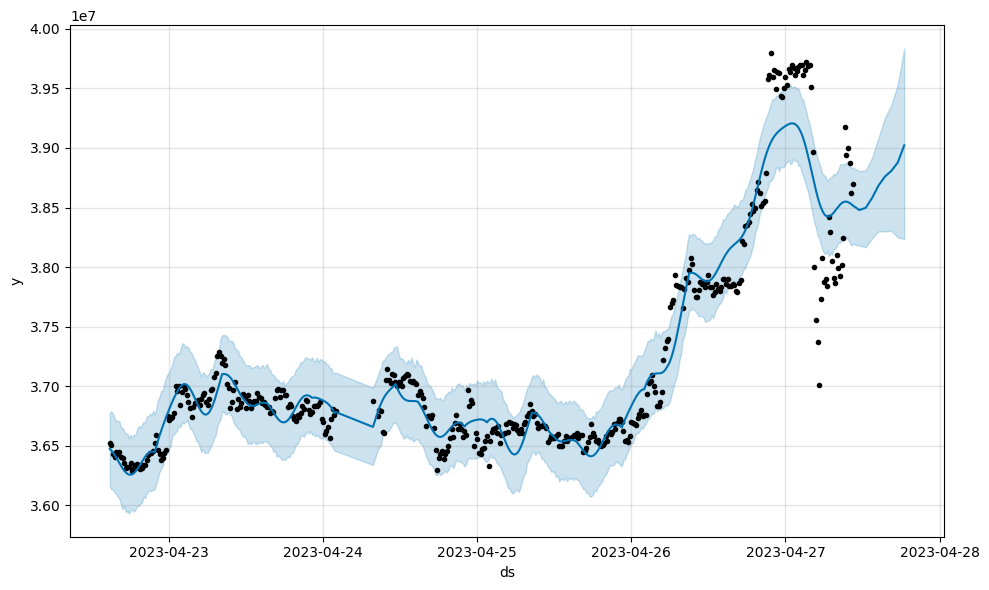

In [167]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


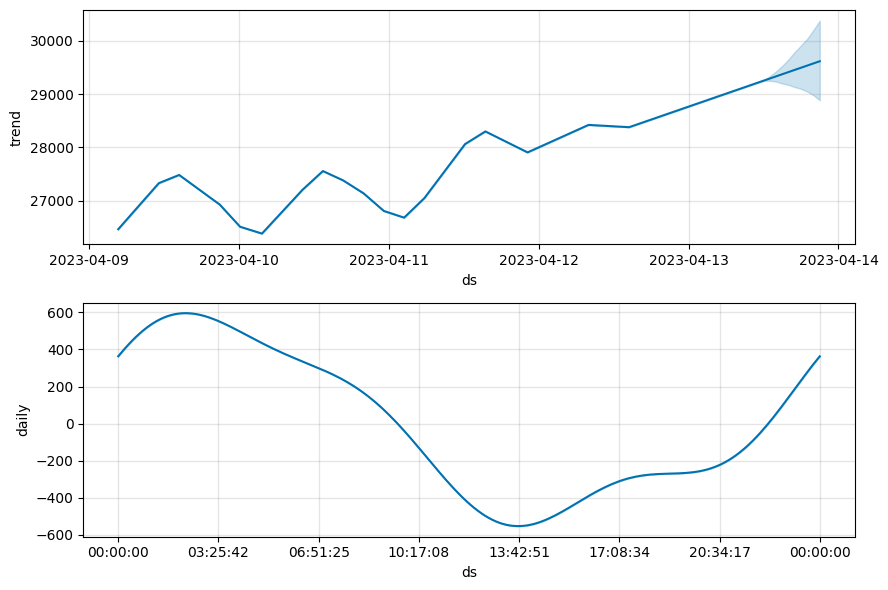

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive


KeyboardInterrupt: ignored